In [229]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


from scipy.interpolate import interp1d

In [230]:
data=pd.read_csv('previsao_de_renda_II.csv')
data.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   data_ref               750000 non-null  object 
 1   index                  750000 non-null  int64  
 2   sexo                   750000 non-null  object 
 3   posse_de_veiculo       750000 non-null  object 
 4   posse_de_imovel        750000 non-null  object 
 5   qtd_filhos             750000 non-null  int64  
 6   tipo_renda             750000 non-null  object 
 7   educacao               750000 non-null  object 
 8   estado_civil           750000 non-null  object 
 9   tipo_residencia        750000 non-null  object 
 10  idade                  750000 non-null  int64  
 11  tempo_emprego          624240 non-null  float64
 12  qt_pessoas_residencia  750000 non-null  float64
 13  renda                  750000 non-null  float64
dtypes: float64(3), int64(3), object(8)
m

In [232]:
data.isna().sum()

data_ref                      0
index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64

In [233]:
data.fillna(data['tempo_emprego'].mean(),inplace=True)

In [234]:
amostra=data.sample(n=2000)

In [236]:
#Separando os três ultimos meses como base teste
teste=amostra[amostra['data_ref']>'2015-12-01']
teste['data_ref'].value_counts()

2016-03-01    157
2016-01-01    141
2016-02-01    120
Name: data_ref, dtype: int64

In [237]:
#Separando a base que vamos treinar o modelo
treino=amostra[amostra['data_ref']<'2016-01-01']
treino['data_ref'].value_counts()

2015-08-01    153
2015-12-01    139
2015-03-01    139
2015-07-01    137
2015-01-01    136
2015-05-01    132
2015-10-01    132
2015-06-01    132
2015-09-01    124
2015-02-01    123
2015-11-01    121
2015-04-01    114
Name: data_ref, dtype: int64

In [238]:
treino['log_renda']=np.log(amostra.renda)
treino

C:\Users\General\AppData\Local\Temp\ipykernel_10904\3718168085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino['log_renda']=np.log(amostra.renda)


,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
3620,2015-01-01,6976,M,N,N,0,Assalariado,Médio,Casado,Casa,32,11.632877,2.0,4477.09,8.406729
356787,2015-08-01,7569,F,N,N,1,Assalariado,Superior completo,União,Com os pais,33,14.690411,3.0,25724.59,10.155203
220486,2015-05-01,4464,F,N,N,0,Empresário,Superior completo,Casado,Com os pais,40,12.849315,2.0,52650.08,10.871423
474630,2015-10-01,7361,F,N,S,1,Servidor público,Superior completo,Casado,Casa,42,11.726027,3.0,23756.00,10.075590
329923,2015-07-01,1211,F,N,N,1,Empresário,Médio,Separado,Casa,41,21.860274,2.0,199286.23,12.202497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344992,2015-07-01,6137,F,N,S,0,Assalariado,Médio,Casado,Governamental,56,10.082192,2.0,54611.86,10.908006
551894,2015-12-01,14980,F,N,S,0,Empresário,Superior completo,Solteiro,Casa,28,3.764384,1.0,3266.48,8.091468
33241,2015-01-01,14552,F,S,S,0,Assalariado,Médio,Separado,Casa,46,3.797260,1.0,3348.37,8.116229
83875,2015-02-01,15634,F,N,S,0,Pensionista,Superior completo,Separado,Casa,58,7.746165,1.0,2251.81,7.719490


In [239]:
res = smf.ols('''log_renda ~  tempo_emprego''',data=treino).fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     1137.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          3.03e-188
Time:                        14:51:16   Log-Likelihood:                -2175.4
No. Observations:                1582   AIC:                             4355.
Df Residuals:                    1580   BIC:                             4365.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2228      0.039    208.225      0.000       8.145       8.300
tempo_emprego     0.1345      0.004     33.722      0.000       0.127       0.142
==============================================================================
Omnibus:                       11.291   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                8.221
Skew:                          -0.047   Prob(JB):                       0.0164
Kurtosis:                       2.660   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

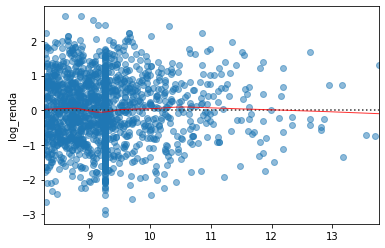

In [240]:
sns.residplot(x=res.predict(),y='log_renda',data=treino,lowess=True,
             scatter_kws={'alpha':0.5},
             line_kws={'color':'red','lw':1,'alpha':0.8});

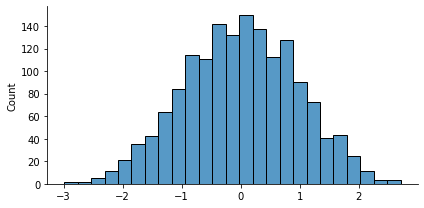

In [241]:
#Para verificar a distribuição
sns.displot(res.resid,height=3,aspect=2)

- É possível verificar que há uma distribuição normal dos residuos

<AxesSubplot:>

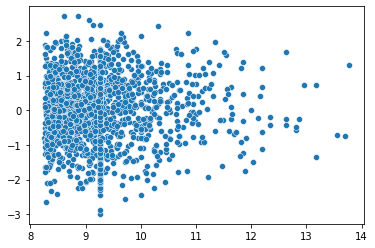

In [243]:
#Faça um gráfico dos resíduos versus os valores preditos

sns.scatterplot(x=res.predict(),y=res.resid)

# Avaliar o grafico acima

## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

In [245]:
treino

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
3620,2015-01-01,6976,M,N,N,0,Assalariado,Médio,Casado,Casa,32,11.632877,2.0,4477.09,8.406729
356787,2015-08-01,7569,F,N,N,1,Assalariado,Superior completo,União,Com os pais,33,14.690411,3.0,25724.59,10.155203
220486,2015-05-01,4464,F,N,N,0,Empresário,Superior completo,Casado,Com os pais,40,12.849315,2.0,52650.08,10.871423
474630,2015-10-01,7361,F,N,S,1,Servidor público,Superior completo,Casado,Casa,42,11.726027,3.0,23756.00,10.075590
329923,2015-07-01,1211,F,N,N,1,Empresário,Médio,Separado,Casa,41,21.860274,2.0,199286.23,12.202497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344992,2015-07-01,6137,F,N,S,0,Assalariado,Médio,Casado,Governamental,56,10.082192,2.0,54611.86,10.908006
551894,2015-12-01,14980,F,N,S,0,Empresário,Superior completo,Solteiro,Casa,28,3.764384,1.0,3266.48,8.091468
33241,2015-01-01,14552,F,S,S,0,Assalariado,Médio,Separado,Casa,46,3.797260,1.0,3348.37,8.116229
83875,2015-02-01,15634,F,N,S,0,Pensionista,Superior completo,Separado,Casa,58,7.746165,1.0,2251.81,7.719490


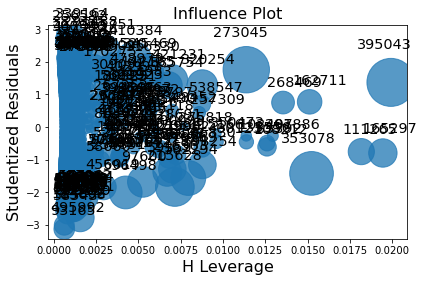

In [246]:
#Pontos influentes
res=smf.ols('log_renda ~ tempo_emprego',data=treino).fit()
fig= sm.graphics.influence_plot(res,criterion='cooks')
fig.tight_layout(pad=1.0)


- Aqui é necessário verificar os pontos que possuem o *Studentized Residuals* alto e o ponto de influência *H Leverage* alto também. Esses pontos podem ser perigosos para o nosso modelo

In [247]:
#Para verificar os pontos discrepantes
treino.sort_values(by='renda').head(10)


,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
83098,2015-02-01,8678,M,S,N,1,Empresário,Médio,Solteiro,Casa,47,0.487671,2.0,278.65,5.629957
581401,2015-12-01,104,F,N,N,0,Empresário,Superior completo,Separado,Com os pais,43,1.183562,1.0,420.25,6.040850
38188,2015-01-01,5640,F,S,N,2,Assalariado,Superior completo,Casado,Casa,36,1.868493,4.0,424.37,6.050606
53980,2015-02-01,13749,M,S,N,0,Assalariado,Médio,Casado,Casa,33,0.534247,2.0,490.07,6.194548
31659,2015-01-01,15306,F,N,N,0,Assalariado,Médio,Solteiro,Casa,48,1.032877,1.0,523.96,6.261415
93165,2015-02-01,9667,F,N,S,0,Pensionista,Médio,Casado,Casa,65,7.746165,2.0,531.44,6.275590
35080,2015-01-01,16041,M,N,S,1,Assalariado,Médio,Casado,Casa,40,1.542466,3.0,587.36,6.375638
495992,2015-10-01,8984,F,N,N,0,Pensionista,Médio,Casado,Casa,62,7.746165,2.0,595.43,6.389284
584640,2015-12-01,4754,F,S,S,2,Assalariado,Superior incompleto,Casado,Casa,31,0.353425,4.0,662.66,6.496262
86139,2015-02-01,14129,F,N,N,0,Assalariado,Superior completo,Casado,Casa,46,0.536986,2.0,721.81,6.581762


- O tempo de emprego muito pequena qualquer renda é um valor muito alto. Nesse caso podemos selecionar 

In [248]:
treino.sort_values(by='renda',ascending=False).head(10)

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
395043,2015-08-01,4270,F,S,S,0,Servidor público,Superior completo,Solteiro,Casa,60,41.200000,1.0,3472840.82,15.060483
273045,2015-06-01,5927,F,N,N,0,Assalariado,Médio,Solteiro,Casa,52,32.742466,1.0,1619608.74,14.297695
162711,2015-04-01,1678,F,N,S,0,Assalariado,Superior completo,Solteiro,Casa,62,36.753425,1.0,1087207.60,13.899123
268469,2015-06-01,15439,F,N,N,0,Assalariado,Médio,Casado,Casa,57,35.142466,2.0,857678.27,13.661984
320254,2015-07-01,7580,F,N,S,0,Assalariado,Médio,Casado,Casa,54,29.534247,2.0,674730.09,13.422068
410384,2015-09-01,5018,F,N,S,0,Servidor público,Superior completo,Casado,Casa,48,23.230137,2.0,612476.60,13.325266
421231,2015-09-01,224,F,N,N,0,Assalariado,Superior completo,Casado,Casa,53,27.041096,2.0,559902.55,13.235518
345469,2015-07-01,11249,F,N,S,1,Empresário,Superior completo,Casado,Casa,48,24.446575,3.0,528517.10,13.177830
316330,2015-07-01,8073,F,N,N,0,Empresário,Médio,Casado,Casa,43,24.736986,2.0,512035.56,13.146149
365751,2015-08-01,3064,F,S,S,0,Empresário,Superior completo,Solteiro,Casa,41,19.561644,1.0,479902.24,13.081338


independência

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

In [250]:
treino.columns

Index(['data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda', 'log_renda'],
      dtype='object')

- A prinipio apenas as varias quantidade de filhos e quantidade de pessoas por residencia possuem uma correlação muito alta

In [252]:
treino.corr(method='spearman')

,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
index,1.000000,0.011819,-0.086594,-0.074398,0.031819,-0.030145,-0.030145
qtd_filhos,0.011819,1.000000,-0.424580,-0.114034,0.845065,-0.014709,-0.014709
idade,-0.086594,-0.424580,1.000000,0.285538,-0.359556,0.088540,0.088540
tempo_emprego,-0.074398,-0.114034,0.285538,1.000000,-0.051676,0.541716,0.541716
qt_pessoas_residencia,0.031819,0.845065,-0.359556,-0.051676,1.000000,0.025534,0.025534
renda,-0.030145,-0.014709,0.088540,0.541716,0.025534,1.000000,1.000000
log_renda,-0.030145,-0.014709,0.088540,0.541716,0.025534,1.000000,1.000000


- A correlação de Spearman tende a ser mais robusta a outliers e tende a captar algumas relações não lineares melhor que a correlação de Pearson

## Calculando o VIF das variavéis

In [253]:
variaveis=['sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil', 'idade', 'tempo_emprego']

In [254]:
treino_dum=pd.get_dummies(treino[variaveis],drop_first=-True)
vif(treino_dum.values,0)

1.6322397649237923

In [256]:
raking_vif=pd.DataFrame()
raking_vif['VIF Factor']= [vif(treino_dum,i) for i in range(treino_dum.shape[1])]
raking_vif['Feature']=treino_dum.columns
raking_vif.round(2)

,VIF Factor,Feature
0,1.63,qtd_filhos
1,26.67,idade
2,3.09,tempo_emprego
3,1.75,sexo_M
4,1.98,posse_de_veiculo_S
5,3.19,posse_de_imovel_S
6,1.01,tipo_renda_Bolsista
7,1.50,tipo_renda_Empresário
8,2.24,tipo_renda_Pensionista
9,1.18,tipo_renda_Servidor público


In [273]:
# Rodando o modelo com todas as variaveis
r1=smf.ols(''' 
log_renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia''',data=treino.dropna()).fit()
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     52.07
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          1.40e-179
Time:                        14:54:06   Log-Likelihood:                -2138.1
No. Observations:                1582   AIC:                             4326.
Df Residuals:                    1557   BIC:                             4460.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.5188      0.788      9.543      0.000       5.973       9.064
sexo[T.M]                            0.0768      0.056      1.360      0.174      -0.034       0.188
posse_de_veiculo[T.S]                0.0116      0.054      0.216      0.829      -0.094       0.117
posse_de_imovel[T.S]                 0.1899      0.053      3.617      0.000       0.087       0.293
tipo_renda[T.Bolsista]              -2.2934      0.945     -2.428      0.015      -4.146      -0.440
tipo_renda[T.Empresário]             0.1159      0.060      1.928      0.054      -0.002       0.234
tipo_renda[T.Pensionista]           -0.3793      0.086     -4.396      0.000      -0.549      -0.210
tipo_renda[T.Servidor público]       0.0358      0.096      0.373      0.709      -0.152       0.224
educacao[T.Médio]                   -0.3877      0.221     -1.757      0.079      -0.821       0.045
educacao[T.Pós graduação]           -1.4525      0.970     -1.497      0.135      -3.355       0.450
educacao[T.Superior completo]       -0.2971      0.223     -1.333      0.183      -0.734       0.140
educacao[T.Superior incompleto]     -0.4196      0.255     -1.646      0.100      -0.920       0.081
estado_civil[T.Separado]             0.5205      0.374      1.392      0.164      -0.213       1.254
estado_civil[T.Solteiro]             0.3500      0.361      0.971      0.332      -0.357       1.057
estado_civil[T.União]                0.0881      0.093      0.950      0.342      -0.094       0.270
estado_civil[T.Viúvo]                0.3713      0.382      0.973      0.331      -0.378       1.120
tipo_residencia[T.Casa]             -0.0346      0.219     -0.158      0.875      -0.465       0.396
tipo_residencia[T.Com os pais]      -0.1492      0.251     -0.595      0.552      -0.641       0.343
tipo_residencia[T.Comunitário]      -0.3023      0.482     -0.627      0.531      -1.248       0.644
tipo_residencia[T.Estúdio]          -0.0848      0.401     -0.212      0.833      -0.871       0.701
tipo_residencia[T.Governamental]    -0.0457      0.269     -0.170      0.865      -0.573       0.482
qtd_filhos                          -0.4376      0.361     -1.214      0.225      -1.145       0.270
idade                                0.0018      0.003      0.580      0.562      -0.004       0.008
tempo_emprego                        0.1345      0.004     31.901      0.000       0.126       0.143
qt_pessoas_residencia                0.4492      0.359      1.252      0.211      -0.255       1.153
==============================================================================
Omnibus:                       15.759   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.389
Skew:             

In [274]:
#Rodando o modelo retirando as variaveis tipo_residencia e qt_pessoas_residencia com maior VIF
r2=smf.ols(''' 
log_renda ~ sexo + posse_de_veiculo + posse_de_imovel + 
qtd_filhos + tipo_renda + educacao + estado_civil + idade + tempo_emprego ''',data=treino).fit()
r2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     69.42
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          2.21e-184
Time:                        14:54:16   Log-Likelihood:                -2139.5
No. Observations:                1582   AIC:                             4317.
Df Residuals:                    1563   BIC:                             4419.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           8.3555      0.262     31.847      0.000       7.841       8.870
sexo[T.M]                           0.0757      0.056      1.346      0.179      -0.035       0.186
posse_de_veiculo[T.S]               0.0138      0.053      0.260      0.795      -0.091       0.118
posse_de_imovel[T.S]                0.1931      0.052      3.736      0.000       0.092       0.294
tipo_renda[T.Bolsista]             -2.2889      0.944     -2.425      0.015      -4.140      -0.438
tipo_renda[T.Empresário]            0.1165      0.060      1.947      0.052      -0.001       0.234
tipo_renda[T.Pensionista]          -0.3764      0.086     -4.381      0.000      -0.545      -0.208
tipo_renda[T.Servidor público]      0.0385      0.096      0.403      0.687      -0.149       0.226
educacao[T.Médio]                  -0.3807      0.220     -1.728      0.084      -0.813       0.051
educacao[T.Pós graduação]          -1.4402      0.969     -1.486      0.137      -3.341       0.460
educacao[T.Superior completo]      -0.2935      0.222     -1.319      0.187      -0.730       0.143
educacao[T.Superior incompleto]    -0.4320      0.254     -1.704      0.089      -0.929       0.065
estado_civil[T.Separado]            0.0671      0.106      0.630      0.529      -0.142       0.276
estado_civil[T.Solteiro]           -0.0904      0.075     -1.204      0.229      -0.238       0.057
estado_civil[T.União]               0.0848      0.092      0.918      0.359      -0.097       0.266
estado_civil[T.Viúvo]              -0.0794      0.130     -0.612      0.541      -0.334       0.175
qtd_filhos                          0.0115      0.036      0.320      0.749      -0.059       0.082
idade                               0.0020      0.003      0.661      0.508      -0.004       0.008
tempo_emprego                       0.1349      0.004     32.091      0.000       0.127       0.143
==============================================================================
Omnibus:                       15.957   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.487
Skew:                          -0.016   Prob(JB):                      0.00528
Kurtosis:                       2.602   Cond. No.                     1.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- É possível verificar que a multicolinearidade alterou o coeficiente de algumas variaveis no pior dos casos altera o  sinal da variavéis como por exemplo a **"qtd_filhos"** está com sinal negativo no modelo com todas features. 

## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.

Remover outliers e retirar as variaveis não significantes 

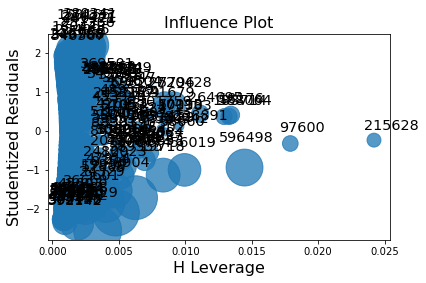

In [326]:
treino2=treino.loc[(treino['renda']>1500) & (treino['renda']<29999)]
res=smf.ols('log_renda ~ tempo_emprego',data=treino2).fit()
fig= sm.graphics.influence_plot(res,criterion='cooks')
fig.tight_layout(pad=1.0)


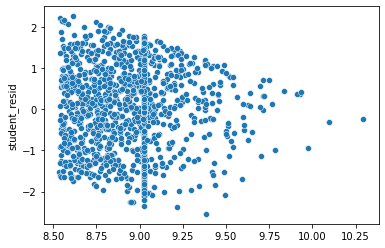

In [327]:
st_res=res.outlier_test()
sns.scatterplot(x=res.predict(),y=st_res.student_resid);

In [328]:
treino2.sort_values(by='renda',ascending=False).head(15)

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
333182,2015-07-01,7134,F,N,S,0,Pensionista,Médio,Viúvo,Casa,66,7.746165,1.0,29890.19,10.305286
113918,2015-03-01,8154,M,S,S,0,Assalariado,Médio,Casado,Casa,53,8.893151,2.0,29685.59,10.298417
370498,2015-08-01,9179,F,N,S,0,Pensionista,Médio,Casado,Casa,65,7.746165,2.0,29662.30,10.297632
314629,2015-07-01,15092,F,S,S,2,Assalariado,Superior completo,Casado,Casa,34,5.830137,4.0,29597.40,10.295442
486068,2015-10-01,7517,M,S,S,2,Pensionista,Médio,Casado,Casa,46,7.746165,4.0,29550.40,10.293853
237608,2015-05-01,12395,F,S,S,2,Empresário,Médio,Casado,Casa,42,9.197260,4.0,29542.03,10.293569
304883,2015-07-01,5187,F,S,S,0,Assalariado,Médio,Casado,Casa,53,10.663014,2.0,29458.20,10.290728
180443,2015-04-01,10101,M,S,S,0,Assalariado,Médio,Casado,Casa,42,3.468493,2.0,29067.22,10.277366
421633,2015-09-01,846,F,N,S,0,Pensionista,Fundamental,Casado,Casa,61,7.746165,2.0,29058.28,10.277059
180084,2015-04-01,9819,F,S,S,0,Empresário,Médio,União,Casa,35,10.180822,2.0,28782.55,10.267525


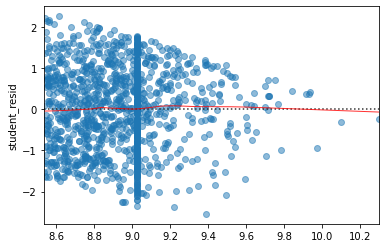

In [329]:
sns.residplot(x=res.predict(),y=st_res.student_resid,lowess=True,
             scatter_kws={'alpha':0.5},
             line_kws={'color':'red','lw':1,'alpha':0.8});

In [330]:
r2=smf.ols(''' 
log_renda ~ sexo + posse_de_veiculo + posse_de_imovel + 
qtd_filhos + tipo_renda + educacao + estado_civil + idade + tempo_emprego ''',data=treino2).fit()
r2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     11.21
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           3.07e-30
Time:                        15:01:11   Log-Likelihood:                -1288.2
No. Observations:                1200   AIC:                             2614.
Df Residuals:                    1181   BIC:                             2711.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           8.7633      0.223     39.381      0.000       8.327       9.200
sexo[T.M]                           0.1635      0.048      3.378      0.001       0.069       0.258
posse_de_veiculo[T.S]              -0.0648      0.047     -1.391      0.165      -0.156       0.027
posse_de_imovel[T.S]                0.0801      0.045      1.764      0.078      -0.009       0.169
tipo_renda[T.Bolsista]             -1.7306      0.716     -2.416      0.016      -3.136      -0.325
tipo_renda[T.Empresário]            0.0690      0.052      1.315      0.189      -0.034       0.172
tipo_renda[T.Pensionista]          -0.1494      0.073     -2.033      0.042      -0.294      -0.005
tipo_renda[T.Servidor público]      0.0614      0.090      0.680      0.497      -0.116       0.238
educacao[T.Médio]                  -0.3384      0.183     -1.848      0.065      -0.698       0.021
educacao[T.Pós graduação]          -1.3675      0.739     -1.850      0.065      -2.818       0.083
educacao[T.Superior completo]      -0.3230      0.185     -1.744      0.081      -0.686       0.040
educacao[T.Superior incompleto]    -0.4595      0.212     -2.171      0.030      -0.875      -0.044
estado_civil[T.Separado]            0.0667      0.091      0.730      0.465      -0.112       0.246
estado_civil[T.Solteiro]           -0.0846      0.067     -1.259      0.208      -0.216       0.047
estado_civil[T.União]               0.0503      0.081      0.617      0.537      -0.110       0.210
estado_civil[T.Viúvo]              -0.0322      0.113     -0.284      0.776      -0.255       0.190
qtd_filhos                          0.0214      0.031      0.685      0.494      -0.040       0.083
idade                              -0.0002      0.003     -0.069      0.945      -0.005       0.005
tempo_emprego                       0.0685      0.005     12.462      0.000       0.058       0.079
==============================================================================
Omnibus:                       73.424   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.512
Skew:                          -0.089   Prob(JB):                     6.44e-07
Kurtosis:                       2.266   Cond. No.                     1.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [331]:
r2=smf.ols(''' 
log_renda ~  tempo_emprego ''',data=treino2).fit()
r2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     152.0
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           5.68e-33
Time:                        15:01:35   Log-Likelihood:                -1311.2
No. Observations:                1200   AIC:                             2626.
Df Residuals:                    1198   BIC:                             2637.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.5214      0.039    215.937      0.000       8.444       8.599
tempo_emprego     0.0651      0.005     12.330      0.000       0.055       0.075
==============================================================================
Omnibus:                      106.201   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.998
Skew:                          -0.099   Prob(JB):                     2.51e-08
Kurtosis:                       2.187   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""